# Specific Heat

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import glob
import scipy.stats as stats
import pandas as pd

In [2]:
sns.set()

In [3]:
data_root = '../data/entropy-order-convolved/'
fig_root="../figures/"
# os.listdir(data_root)

In [12]:
classname="BA_NetworkPercolationExplosive_v7"
signature="{}_N_*_m_10_M_{}_entropy-order_*fast.txt"
m = 10
print(signature)

'{}_N_*_m_10_M_{}_entropy-order_*fast.txt'

In [15]:
files

['../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_800000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1200000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_1000000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_400000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt',
 '../data/entropy-order-convolved/BA_NetworkPercolationExplosive_v7_N_600000_m_10_M_2_entropy-order_2019_avg.txt_convoluted_1times_fast.txt']

### checking ensemble size

In [8]:
print("Ensemble sizes")
for file in files:
    with open(file) as f:
        line=f.readline()
        head=json.loads(line[1:])
        print("N=", head['N'], "  En=", head['En'])

Ensemble sizes
N= 800000   En= 20000
N= 1200000   En= 20000
N= 1000000   En= 20000
N= 400000   En= 20000
N= 600000   En= 20000


## Load data from file

### Plot entropy

In [31]:
def plot_one_entropy(M, ax, i, j):
    """
    plot entropy for provided M values
    """
    files=glob.glob(data_root + signature.format(classname,M))
    for file in files:
        with open(file) as f:
            line=f.readline()
            head=json.loads(line[1:])
            N=int(head['N'])
            M=int(head['M'])
            m=int(head['m'])
        t, H, P = np.loadtxt(file, unpack=True)

        index=np.linspace(0, t.shape[0]-1, 2000, dtype=int)
        ax[i, j].plot(t[index], H[index], label="N={}k".format(N//1000))
    ax[i, j].legend()
    ax[i, j].set_xlim([0.48, 1.2])
    ax[i, j].text(0.8, 13.5, "M={}".format(M))

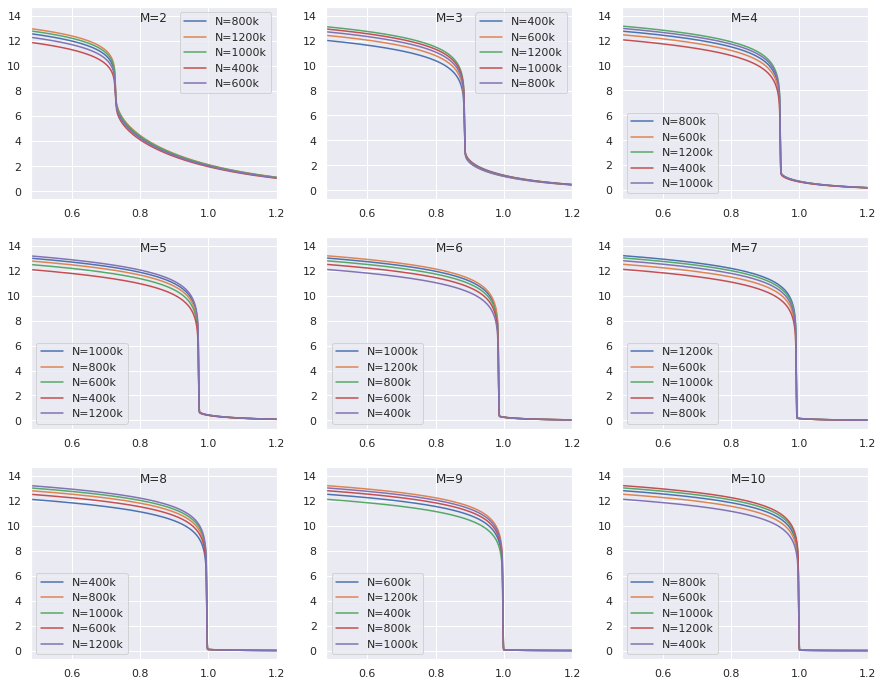

In [37]:
fig, ax=plt.subplots(3,3, figsize=(15, 12))


i, j = 0, 0
for M in range(2, 11):
    plot_one_entropy(M, ax, i, j)
    
    
    j += 1
    if j >= 3:
        j = 0
        i+= 1


filename=fig_root + classname + "_all_entropy2_m{}".format(m)
plt.savefig(filename)

### Plot Order parameter

In [34]:
def plot_one_order(M, ax, i, j):
    """
    plot entropy for provided M values
    """
    files=glob.glob(data_root + signature.format(classname,M))
    for file in files:
        with open(file) as f:
            line=f.readline()
            head=json.loads(line[1:])
            N=int(head['N'])
            M=int(head['M'])
            m=int(head['m'])
        t, H, P = np.loadtxt(file, unpack=True)

        index=np.linspace(0, t.shape[0]-1, 2000, dtype=int)
        ax[i, j].plot(t[index], P[index], label="N={}k".format(N//1000))
    ax[i, j].legend()
    ax[i, j].set_xlim([0.6, 1.1])
    ax[i, j].text(0.62, 0.2, "M={}".format(M))

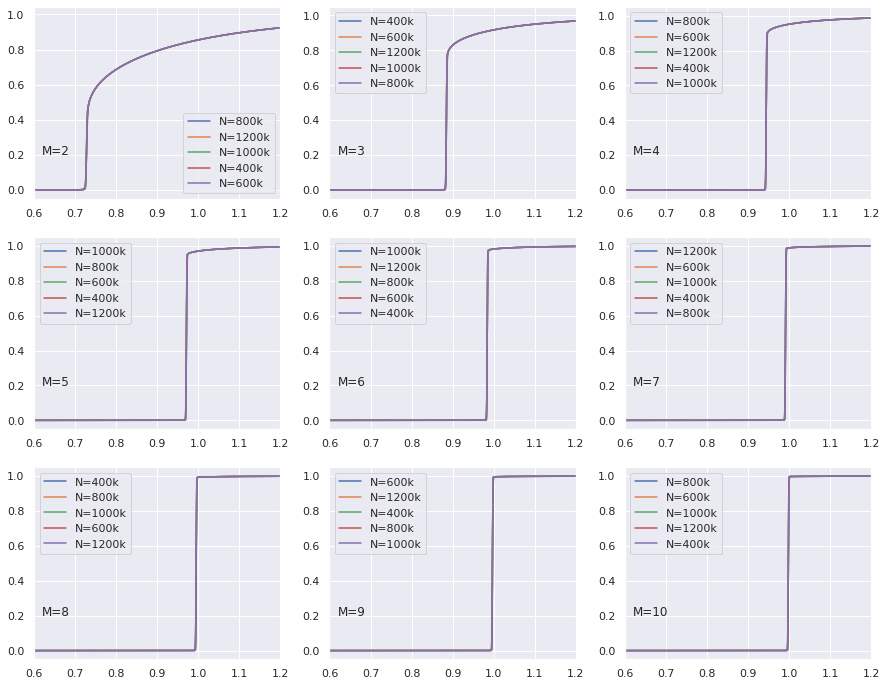

In [36]:
fig, ax=plt.subplots(3,3, figsize=(15, 12))


i, j = 0, 0
for M in range(2, 11):
    plot_one_order(M, ax, i, j)
    
    
    j += 1
    if j >= 3:
        j = 0
        i+= 1


filename=fig_root + classname + "_all_order-parameter2_m{}".format(m)
plt.savefig(filename)